In [2]:
# %load overfit_dropout.py
import os
import sys
sys.path.append("..\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

def box_off():
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
# use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2 #드랍아웃 비율 설정
# ====================================================

# num_epochs = 301
num_epochs = 501
# num_epochs = 1001
# num_epochs = 1501
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=num_epochs, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.3648801872969387
=== epoch:1, train acc:0.09333333333333334, test acc:0.11 ===
train loss:2.338296582065929
train loss:2.3209117066505787
train loss:2.322589909797648
=== epoch:2, train acc:0.1, test acc:0.1093 ===
train loss:2.3183786736585987
train loss:2.3110743512337986
train loss:2.319772920590909
=== epoch:3, train acc:0.1, test acc:0.1098 ===
train loss:2.3114445762001496
train loss:2.314413307002033
train loss:2.307632219984202
=== epoch:4, train acc:0.1, test acc:0.1107 ===
train loss:2.2989324156687885
train loss:2.302002121077278
train loss:2.3226242865903224
=== epoch:5, train acc:0.10666666666666667, test acc:0.1109 ===
train loss:2.3077655692204346
train loss:2.2931695075168212
train loss:2.3193791110943085
=== epoch:6, train acc:0.11, test acc:0.1118 ===
train loss:2.3328721552623084
train loss:2.3042104240505745
train loss:2.2983747717440983
=== epoch:7, train acc:0.11, test acc:0.1132 ===
train loss:2.2855994233051855
train loss:2.315434451779298
train los

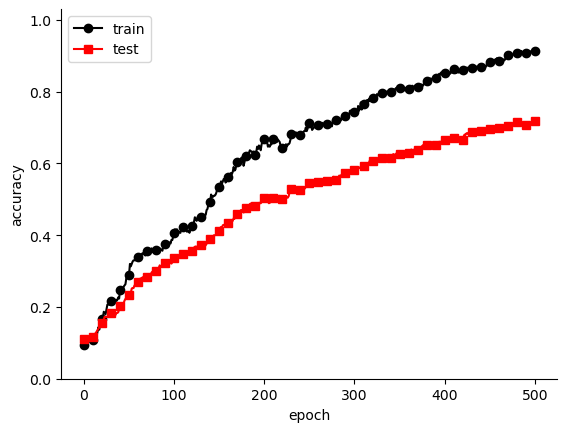

In [4]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, color='k', marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, color='r', marker='s', label='test', markevery=10)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim(0, 1.03)
plt.legend(loc='upper left')
# plt.legend(loc='lower right')
box_off()